Reading data from a scope (Memory prime)

Updated 5/6/2020 (RPS)

In [114]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import pandas as pd

# %matplotlib inline
%matplotlib nbagg

In [115]:
# user-modified area:
two_channels =1 # 0 means just a single channel of data, 1 means there are two channels of interest.

file_dir = './data/memory_prime_oscope_data/'
filenameCH1 = 'A0000CH1.CSV'

if two_channels == 1:
    filenameCH2 = 'A0000CH2.CSV'

In [116]:
# # import data from csv file
filepath1 = file_dir+filenameCH1

if two_channels == 1:
    filepath2 = file_dir+filenameCH2

    
# load data file
# we'll use pandas to load data because this makes for easier manipulation of the header info 
# which we need for scaling the axes of the data...

dataALL1 = pd.read_csv(filepath1,header=None)
voltage1_raw = pd.to_numeric(np.array(dataALL1[0][16:]))

if two_channels == 1:
    dataALL2 = pd.read_csv(filepath2,header=None)
    voltage2_raw = pd.to_numeric(np.array(dataALL2[0][16:]))


In [117]:
# np.size(np.array(dataALL1[0][16:]))

In [118]:
# figure out the scale -- this extracts the scaling factors needed to give calibrated data.
Dt =float(dataALL1[1][11])/25/2  # doing this creates the appropriate time axis
DV1 =float(dataALL1[1][5])/25    # doing this scales the raw data into calibrated Voltage units. 

if two_channels == 1:
    DV2 =float(dataALL2[1][5])/25
    DV2

In [119]:
signal1 = voltage1_raw*DV1
time1 = np.arange(0,len(signal1)*Dt,Dt)[0:(len(voltage1_raw))]  # that last part [] is just to ensure that the number of data points is the same bw x and y

if two_channels == 1:
    signal2 = voltage2_raw*DV2
    time2 = np.arange(0,len(signal2)*Dt,Dt)[0:(len(voltage1_raw))]


# if the o-scope saves two columns...
# signal = pd.to_numeric(np.array(data_file['4000'][16:]))
# time = pd.to_numeric(np.array(data_file['Memory Length'][16:]))

In [120]:
# data = np.genfromtxt(filepath,delimiter=',',skip_header=16 )
# signal = data[:,0]

<IPython.core.display.Javascript object>


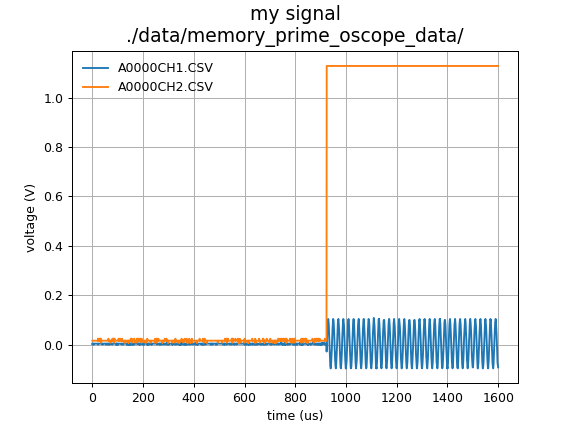

In [121]:
titlestuff = 'my signal'

plt.plot(time1*1e6,signal1,label=filenameCH1)

if two_channels == 1:
    plt.plot(time2*1e6,signal2,label=filenameCH2)

plt.xlabel('time (us)')
plt.ylabel('voltage (V)')
plt.title(titlestuff+'\n'+file_dir,fontsize=15)
# plt.xlim([100,150])
plt.grid(True)
plt.legend(frameon=False,loc='best') 
plt.show()

In [186]:
mean_sig

8.0882720680170035

In [188]:
np.mean(signew)/1.38

5.861066715954351

I recall that there 

In [134]:
800e-6/4000

2.0000000000000002e-07

In [137]:
np.max(signew)

76